# Image acquisition and camera II

## Intrisic parameters (internal to the camera)
 * Those parameters needed to relate an image point(in pixesl on image buffer) to a direction in the camera frame (coordinates system)
 * f_x, f_y, c_x, c_y (focal lenght expressed in pixels and center of the image in the image buffer).
    <code>**We can express focal lenght in mm as well, but then we need to know the size of a pixel in mm**</code>
 * Lens distortion parameters.  <code>**When we can't use simple pinhole camera model**</code> Real lenses usually have some distortion, mostly radial distortion and slight tangential distortion.
 
## Extrinsic parameters
  * Define the position and orientation <code>**(pose)**</code> of the camera frame in the world or with respect to some world coordinate system.

## Coordinate systems a.k.a referance frames


### Image formation from a geometrical point of view

* Image frames are 2D, other objects 3D
* Pose (position and orientation) of a 3D body has <code>**6 DOF(degrees of freedom)**</code>

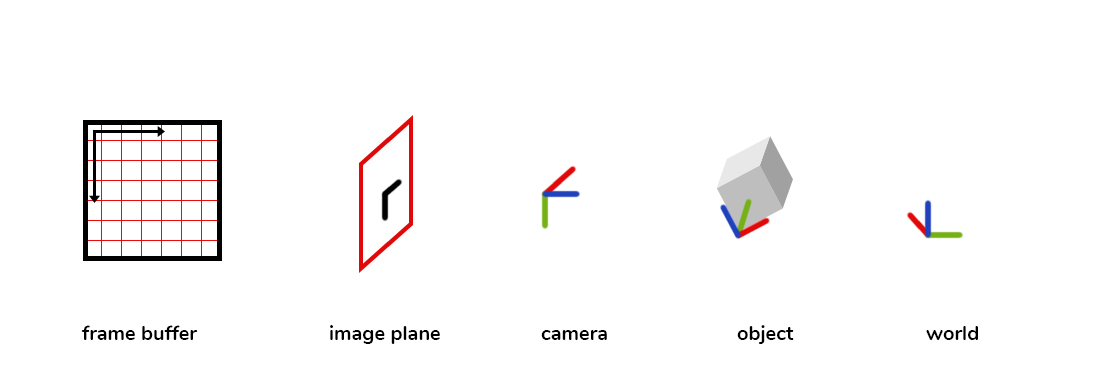

Given a 3D point P in this some arbitrary romm (world), we want to find the pixel coordinates (x, y) of this 3D point in the image taken by the camera. So how to determine position of model in the world given frame buffer data ?

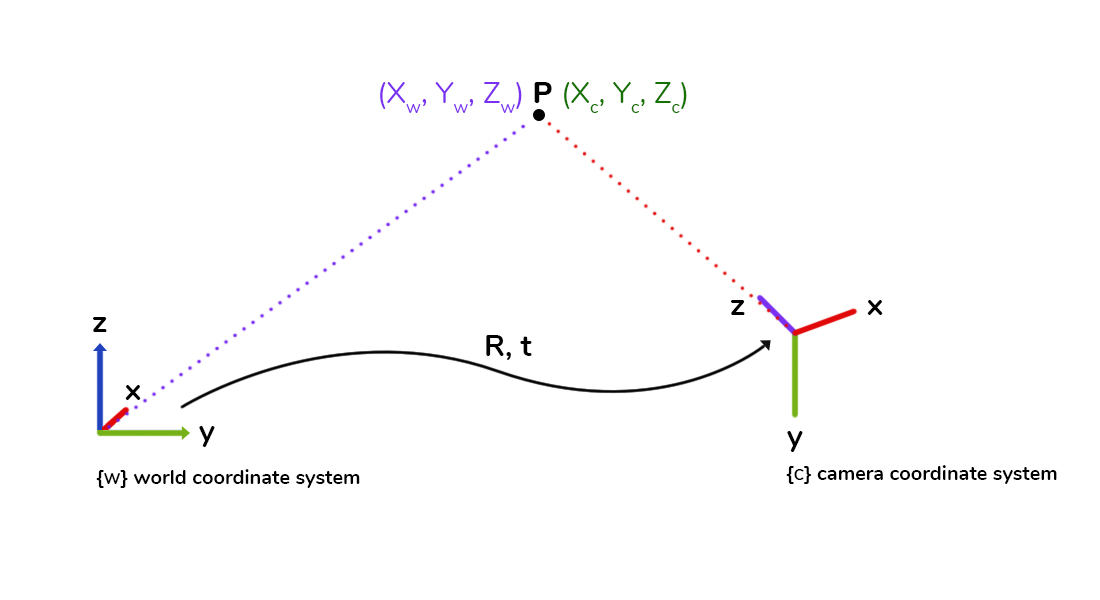

Let’s say our camera is located at some arbitrary location (t_X, t_Y, t_Z) in the room. In jargon the camera coordinate is <code>**t - translated**</code> by <code>**(t_X, t_Y, t_Z)**</code> vector with respect to the world coordinates.
The camera may be also looking in some arbitrary direction. The camera is <code>**R - rotated**</code> with respect to the world coordinate system.

Camera Coordinate System (frame) is related by a <code>**Rotation and a translation**</code>. These six parameters ( 3 for rotation, and 3 for translation ) are called the <code>**extrinsic parameters of a camera**</code>.

### Rotation
Sometimes in jargon its callded <code>**yaw, pitch, and roll**</code>. And the most convenient way to to encode rotation  for mathematical manipulation is by a <code>**3×3**</code> matrix that reoresent 3 angles.

\begin{equation*}
^W_C R = \begin{bmatrix} ^W\hat{X}_C & ^W\hat{Y}_C & ^W\hat{X}_C \end{bmatrix} = 
\begin{bmatrix}
r_{11} & r_{12} & r_{13} \\
r_{21} & r_{22} & r_{23} \\
r_{31} & r_{32} & r_{33}
\end{bmatrix} 
\end{equation*}

shows the orientation of <code>**{C}**</code> relative to <code>**{W}**</code>. <code>**Memorize this notation!**</code>

### Example 

How to expres <code>**transform**</code> a vector from one frame to another with rotation<br>:
 * about the <code>**X**</code> axis:

\begin{equation*}
\begin{bmatrix}
^{W}x \\
^{W}y \\
^{W}z
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos(\theta_{x}) & -sin(\theta_{x}) \\
0 & sin(\theta_{x}) & \cos(\theta_{x})
\end{bmatrix}
\begin{bmatrix}
^{C}x \\
^{C}y \\
^{C}z
\end{bmatrix}
\end{equation*}
<br>
* about the <code>**Y**</code> axis:

\begin{equation*}
\begin{bmatrix}
^{W}x \\
^{W}y \\
^{W}z
\end{bmatrix}
=
\begin{bmatrix}
\cos(\theta_{y}) &  0 &sin(\theta_{y}) \\
0 & 1 & 0 \\
-sin(\theta_{y}) & 0 & \cos(\theta_{y})
\end{bmatrix}
\begin{bmatrix}
^{C}x \\
^{C}y \\
^{C}z
\end{bmatrix}
\end{equation*}

* about the <code>**Z**</code> axis:

\begin{equation*}
\begin{bmatrix}
^{W}x \\
^{W}y \\
^{W}z
\end{bmatrix}
=
\begin{bmatrix}
\cos(\theta_{z}) & -sin(\theta_{z}) & 0 \\
sin(\theta_{z}) & \cos(\theta_{z}) & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
^{C}x \\
^{C}y \\
^{C}z
\end{bmatrix}
\end{equation*}

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# in radians
theta = 0.2
# x,y,z
t = np.array([5, 2, 4])
# Rotation matrix
def rotate(theta):
    return np.array([
    [np.round(np.cos(theta), 4), np.round(-np.sin(theta),4), 0], 
    [np.round(np.sin(theta), 4), np.round(np.cos(theta), 4), 0],
    [0,  0, 1]
])
R = rotate(theta)
transform = R.dot(t)

print('initial vector')
print(t)
print('\n')
print('rotation matrix')
print(R)
print('\n')
print('transformed vector')
print(transform)

initial vector
[5 2 4]


rotation matrix
[[ 0.9801 -0.1987  0.    ]
 [ 0.1987  0.9801  0.    ]
 [ 0.      0.      1.    ]]


transformed vector
[4.5031 2.9537 4.    ]


We can concatenate the 3 rotations in any order to yield a single 3x3 rotation matrix

\begin{equation*}
R = R_{z}R_{y}R_{x} = \begin{bmatrix}
r_{11} & r_{12} & r_{13} \\
r_{21} & r_{22} & r_{23} \\
r_{31} & r_{32} & r_{33}
\end{bmatrix} 
\end{equation*}


<code>**NOTE**</code> rotation matrices are orthonormal so the inverse of a rotation matrix is just its transpose
\begin{equation*}
^W_CR^{-1} = ^W_CR^{T} = ^C_W R
\end{equation*}


### Translation

Literally it's just a position vector <code>**(transaltion of C's origin)**</code> expresed in a referance W frame

\begin{equation*}
^W t_{Corg}
\end{equation*}

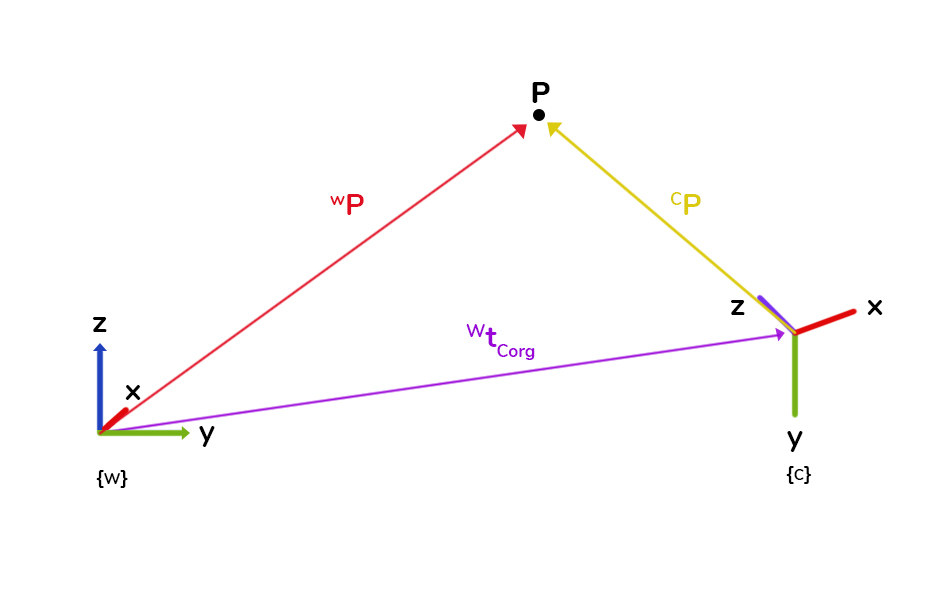



\begin{equation*}
^WP= ^W_C R \cdot  ^C P +  ^{W}t_{Corg} 
\end{equation*}

Where:
 - W_P is the representation of P in the frame <code>**{W}**</code>
 - C_P is the representation of P in the frame <code>**{B}**</code>

### Homogenous Coordinates

In projective geometry, we often work with a funny representation of coordinates where an extra dimension is appended to the coordinates.
We can represent the transformation with a single matrix multiplication if we write P in homogeneous coordinates.

 - This simply means to append a 1 as a 4'th element
 - If the 4'th element becomes not equal to 1 , we divide through by it

Basically it allows us to represent infinite quantities using finite numbers. For example, the point at infinity can be represented as <code>**(1, 1, 1, 0)**</code> in homogenous coordinates. 

\begin{equation*}
^WP = 
\begin{bmatrix}
X \\
Y \\
Z \\
1 
\end{bmatrix}
= 
\begin{bmatrix}
sX \\
sY \\
sZ \\
s 
\end{bmatrix}
\end{equation*}

Then 


\begin{equation*}
^CP  =  H \cdot ^{W}P, 
H =
\begin{bmatrix}
^W_C R  & ^W P_{Corg} \\
0  0  0 & 1 \\
\end{bmatrix}
\end{equation*}


This is equal to more often used representation in computer vision:

\begin{equation*}
P =
\begin{bmatrix}
R | t
\end{bmatrix}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
X_C \\
Y_C \\
Z_C 
\end{bmatrix}
=
\begin{bmatrix}
R | t
\end{bmatrix}
\begin{bmatrix}
X_W \\
Y_W \\
Z_W \\
1
\end{bmatrix}
\end{equation*}


<code>**More details about mathematical manipulation to encode rotation and transaltion:**</code>
[spatial_descriptions_and_transformations](../robotic_basics/__spatial_descriptions_and_transformations.ipynb)

## Exercise

 * In a coordinate frame {A} , point P is at (1,0,1)
 * Frame B is located at(0, 0, 10) and is rotated 180 degrees about the x axis with respect to frame {A} 
 * What is point P in frame {B}

## Intrinsic parameters

The matrix <code>**K**</code> shown below is called the <code>**Intrinsic Matrix**</code> and contains the intrinsic parameters of the camera.

\begin{equation*}
K =
\begin{bmatrix}
f_x && 0 && c_x\\
0 && f_y && c_y\\
0 && 0 && 1 
\end{bmatrix}
\end{equation*}

 * <code>**(cx, cy)**</code>  is a principal point that is usually at the image center
 * <code>**(fx, fy)**</code>  are the focal lengths expressed in pixel units.

### Lense distortions

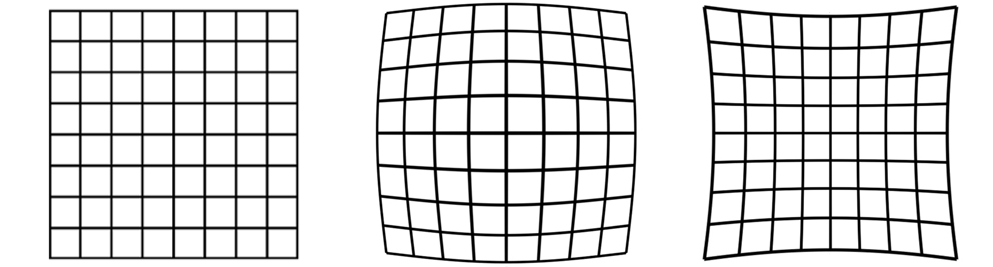

In order to reduce the distortion, luckily this distortion can be captured by five numbers called <code>**Distortion Coefficients**</code>, whose values reflect the amount of radial and tangential distortion in an image. If we know the values of all the coefficients, we can use them to calibrate our camera and undistort the distorted images

\begin{equation*}
D_{coefficients} = (k_1, k_2, p_1, p_2, [k_3, [k_4, k_5, k_6]])
\end{equation*}

So, we know that the distortion changes the size and shape of the object in an image. But, how do we calibrate for that?
Well, we can take pictures of known shapes, then we’ll be able to detect and correct any distortion errors. We could choose any shape to calibrate our camera, and we’ll use a chessboard.